# Health Sites Near You

Name: Thea Ellen Go

Section: S12

### How many health-related amenities are there in provinces where you, your family, and relatives are currently residing in?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
data = pd.read_csv('./datasets/westernvisayas.csv')
data = data.append(pd.read_csv('./datasets/centralvisayas.csv'))
data = data.append(pd.read_csv('./datasets/ncr.csv'))
data.head()

,"Date and Time Downloaded : 05/04/2021 03:44:00 pm""Health Facility Code""",Health Facility Code Short,Facility Name,Old Health Facility Names,Old Health Facility Name 2,Old Health Facility Name 3,Health Facility Type,Ownership Major Classification,Ownership Sub-Classification for Government facilities,Ownership Sub-Classification for private facilities,...,Official Website,Facility Head: Last Name,Facility Head: First Name,Facility Head: Middle Name,Facility Head: Position,Hospital Licensing Status,Service Capability,Bed Capacity,"Date and Time Downloaded : 05/04/2021 04:31:14 pm""Health Facility Code""","Date and Time Downloaded : 05/04/2021 04:29:42 pm""Health Facility Code"""
0,DOH000000000000003,3,DON LEOVIGILDO N. DIAPO SR. MUNICIPAL HOSPITAL,NaN,NaN,NaN,Infirmary,Government,Local Government Unit,NaN,...,NaN,FUENTES,STEVENS,NaN,Chief of Hospital,With License,NaN,10.0,NaN,NaN
1,DOH000000000000014,14,TOBIAS FORNIER RURAL HEALTH UNIT,NaN,NaN,NaN,Rural Health Unit,Government,Local Government Unit,NaN,...,NaN,RUBINOS,ENCARNACION,A.,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN
2,DOH000000000000040,40,MIAG-AO RURAL HEALTH UNIT,NaN,NaN,NaN,Rural Health Unit,Government,Local Government Unit,NaN,...,NaN,GELLADA,JESSEL,COLLADA,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN
3,DOH000000000000041,41,TANGALAN RURAL HEALTH UNIT,NaN,NaN,NaN,Rural Health Unit,Government,Local Government Unit,NaN,...,NaN,FUENTES,SUMNER,TOSCO,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN
4,DOH000000000000055,55,BATAN RURAL HEALTH UNIT,,,,Rural Health Unit,Government,Local Government Unit,,...,,REFOL,KATHRYNE,B.,Municipal Health Officer,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(6330, 36)

Drop unnecessary columns

In [5]:
data.columns

Index(['Date and Time Downloaded : 05/04/2021 03:44:00 pm"Health Facility Code"',
       'Health Facility Code Short', 'Facility Name',
       'Old Health Facility Names', 'Old Health Facility Name 2',
       'Old Health Facility Name 3', 'Health Facility Type',
       'Ownership Major Classification',
       'Ownership Sub-Classification for Government facilities',
       'Ownership Sub-Classification for private facilities',
       'Street Name and #           ', 'Building name and #', 'Region Name',
       'Region PSGC', 'Province Name', 'Province PSGC',
       'City/Municipality Name', 'City/Municipality PSGC', 'Barangay Name',
       'Barangay PSGC', 'Zip Code', 'Landline Number', 'Landline Number 2',
       'Fax Number', 'Email Address', 'Alternate Email Address',
       'Official Website', 'Facility Head: Last Name',
       'Facility Head: First Name', 'Facility Head: Middle Name',
       'Facility Head: Position', 'Hospital Licensing Status',
       'Service Capability', 'Bed C

In [6]:
data.drop(['Date and Time Downloaded : 05/04/2021 03:44:00 pm"Health Facility Code"',
           'Old Health Facility Names',
           'Old Health Facility Name 2',
           'Old Health Facility Name 3',
           'Ownership Sub-Classification for private facilities',
           'Email Address',
           'Alternate Email Address',
           'Official Website',
           'Facility Head: Last Name',
           'Facility Head: First Name',
           'Facility Head: Middle Name',
           'Facility Head: Position',
           'Region PSGC',
           'Province PSGC',
           'Barangay PSGC',
           'City/Municipality PSGC',
           'Landline Number',
           'Landline Number 2',
           'Fax Number',
           'Date and Time Downloaded : 05/04/2021 04:31:14 pm"Health Facility Code"',
           'Date and Time Downloaded : 05/04/2021 04:29:42 pm"Health Facility Code"'], axis='columns', inplace=True)

Rename columns

In [7]:
data = data.rename(columns={'Health Facility Code Short' : 'Facility Code', 
                    'Health Facility Type' : 'Facility Type',
                    'Ownership Major Classification' : 'Ownership',
                    'Ownership Sub-Classification for Government facilities' : 'Sub-Ownership',
                    'Street Name and #           ' : 'Street',
                    'Building name and #': 'Building',
                    'Region Name' : 'Region',
                    'Province Name' : 'Province',
                    'City/Municipality Name' : 'City/Municipality',
                    'Barangay Name' : 'Barangay'})

In [8]:
data.head()

,Facility Code,Facility Name,Facility Type,Ownership,Sub-Ownership,Street,Building,Region,Province,City/Municipality,Barangay,Zip Code,Hospital Licensing Status,Service Capability,Bed Capacity
0,3,DON LEOVIGILDO N. DIAPO SR. MUNICIPAL HOSPITAL,Infirmary,Government,Local Government Unit,NaN,NaN,REGION VI (WESTERN VISAYAS),AKLAN,MADALAG,POBLACION,5603,With License,NaN,10.0
1,14,TOBIAS FORNIER RURAL HEALTH UNIT,Rural Health Unit,Government,Local Government Unit,NaN,NaN,REGION VI (WESTERN VISAYAS),ANTIQUE,TOBIAS FORNIER (DAO),POBLACION NORTE,5716,NaN,NaN,NaN
2,40,MIAG-AO RURAL HEALTH UNIT,Rural Health Unit,Government,Local Government Unit,MUEDA STREET,NaN,REGION VI (WESTERN VISAYAS),ILOILO,MIAGAO,BAYBAY SUR (POB.),5023,NaN,NaN,NaN
3,41,TANGALAN RURAL HEALTH UNIT,Rural Health Unit,Government,Local Government Unit,SAN JUAN STREET,NaN,REGION VI (WESTERN VISAYAS),AKLAN,TANGALAN,POBLACION,5612,NaN,NaN,NaN
4,55,BATAN RURAL HEALTH UNIT,Rural Health Unit,Government,Local Government Unit,,,REGION VI (WESTERN VISAYAS),AKLAN,BATAN,POBLACION,5615,NaN,NaN,NaN


In [9]:
data = data.replace(to_replace ="NCR, CITY OF MANILA, FIRST DISTRICT (Not a Province)", value ="MANILA")
data['Province'].unique()

array(['AKLAN', 'ANTIQUE', 'ILOILO', 'CAPIZ', 'NEGROS OCCIDENTAL',
       'GUIMARAS', 'CEBU', 'BOHOL', 'NEGROS ORIENTAL', 'SIQUIJOR',
       'NCR, SECOND DISTRICT (Not a Province)',
       'NCR, FOURTH DISTRICT (Not a Province)',
       'NCR, THIRD DISTRICT (Not a Province)', 'MANILA'], dtype=object)

**We will be looking at:**
1. Iloilo,
2. Cebu,
3. City of Manila

In [10]:
df = data[data['Province'] == 'ILOILO']
df = df.append(data[data['Province'] == 'CEBU'])
df = df.append(data[data['Province'] == 'MANILA'])
df.head()

,Facility Code,Facility Name,Facility Type,Ownership,Sub-Ownership,Street,Building,Region,Province,City/Municipality,Barangay,Zip Code,Hospital Licensing Status,Service Capability,Bed Capacity
2,40,MIAG-AO RURAL HEALTH UNIT,Rural Health Unit,Government,Local Government Unit,MUEDA STREET,NaN,REGION VI (WESTERN VISAYAS),ILOILO,MIAGAO,BAYBAY SUR (POB.),5023,NaN,NaN,NaN
5,61,SAN MIGUEL RURAL HEALTH UNIT,Rural Health Unit,Government,Local Government Unit,ROXAS STREET,NaN,REGION VI (WESTERN VISAYAS),ILOILO,SAN MIGUEL,BGY. 1 POB. (ROXAS ST.),5025,NaN,NaN,NaN
11,123,BALASAN RURAL HEALTH UNIT,Rural Health Unit,Government,Local Government Unit,CORNER J. LUNA AND MALUNDA STREETS,NaN,REGION VI (WESTERN VISAYAS),ILOILO,BALASAN,POBLACION SUR,5018,NaN,NaN,NaN
17,424,"GOVERNOR NIEL D. TUPAS, SR. DISTRICT HOSPITAL",Hospital,Government,Local Government Unit,NaN,NaN,REGION VI (WESTERN VISAYAS),ILOILO,BAROTAC VIEJO,SAN LUCAS,5011,With License,Level 1,25.0
20,481,DON JOSE S. MONFORT MEDICAL CENTER EXTENSION H...,Hospital,Government,Department Of Health,NaN,NaN,REGION VI (WESTERN VISAYAS),ILOILO,BAROTAC NUEVO,TABUCAN,5007,With License,Level 1,100.0


### Count

In [11]:
bycount = df[['Facility Type', 'Province']]
bycount.head()

,Facility Type,Province
2,Rural Health Unit,ILOILO
5,Rural Health Unit,ILOILO
11,Rural Health Unit,ILOILO
17,Hospital,ILOILO
20,Hospital,ILOILO


Here are the number of facilities for each facility type in each province.

In [12]:
bycount.groupby('Province')['Facility Type'].value_counts().unstack()

Facility Type,Ambulatory Surgical Clinic,Barangay Health Station,Birthing Home,COVID-19 Testing Laboratory,City Health Office,Dialysis Clinic,Drug Abuse Treatment and Rehabilitation Centers,Drug Testing Laboratory,General Clinic Laboratory,Hospital,Infirmary,Municipal Health Office,Occupational Dental Laboratory,Rural Health Unit,Social hygiene Clinic,Special Clinical Laboratory
Province,,,,,,,,,,,,,,,,
CEBU,1.0,1087.0,138.0,12.0,2.0,NaN,5.0,1.0,3.0,40.0,27.0,NaN,3.0,75.0,4.0,1.0
ILOILO,NaN,562.0,10.0,7.0,NaN,NaN,1.0,NaN,NaN,26.0,3.0,1.0,NaN,52.0,1.0,NaN
MANILA,1.0,1.0,NaN,19.0,NaN,1.0,NaN,NaN,32.0,30.0,NaN,NaN,NaN,59.0,1.0,NaN


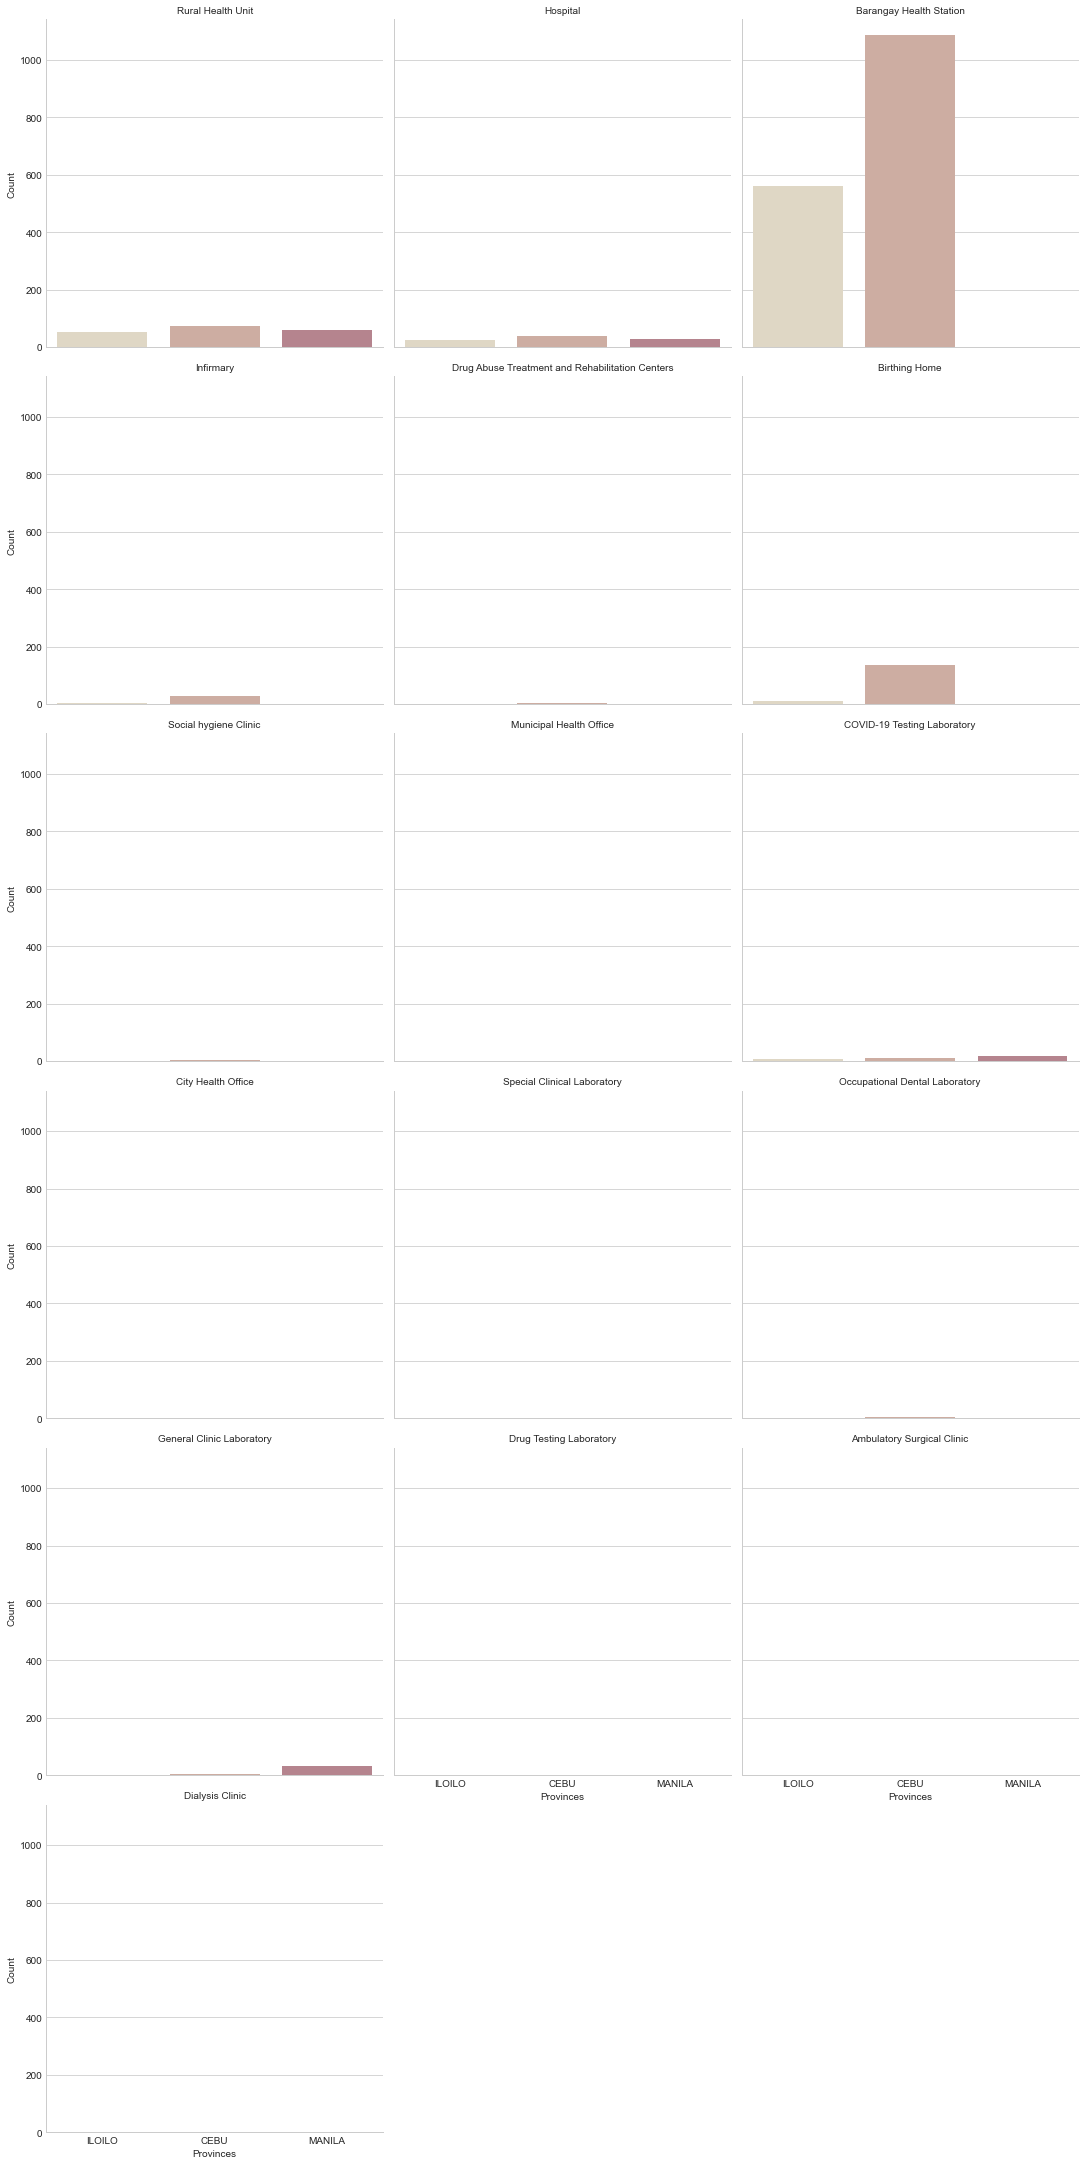

In [13]:
g = sns.catplot(x='Province', col='Facility Type', col_wrap=3, data=bycount,
                kind='count', height=5, palette=sns.color_palette("ch:s=-.2,r=.6"))
g.set_axis_labels('Provinces', 'Count')
g.set_titles('{col_name}')

plt.show()

### Area

In [14]:
area = pd.read_csv('./datasets/areas.csv')
area.head()

,OBJECTID *,Shape *,Shape_Length,Shape_Area,admin2Name_en,admin2Pcode,admin2RefName,admin2AltName1_en,admin2AltName2_en,admin1Name_en,admin1Pcode,admin0Name_en,admin0Pcode,date,validOn,validTo
0,1,Polygon,2.640967,0.334223,Abra,PH140100000,<Null>,<Null>,<Null>,Cordillera Administrative Region,PH140000000,Philippines (the),PH,6/30/2016,5/29/2020,<Null>
1,2,Polygon,3.674955,0.220065,Agusan del Norte,PH160200000,<Null>,<Null>,<Null>,Region XIII,PH160000000,Philippines (the),PH,6/30/2016,5/29/2020,<Null>
2,3,Polygon,5.222636,0.693968,Agusan del Sur,PH160300000,<Null>,<Null>,<Null>,Region XIII,PH160000000,Philippines (the),PH,6/30/2016,5/29/2020,<Null>
3,4,Polygon,4.626091,0.139664,Aklan,PH060400000,<Null>,<Null>,<Null>,Region VI,PH060000000,Philippines (the),PH,6/30/2016,5/29/2020,<Null>
4,5,Polygon,6.507665,0.205939,Albay,PH050500000,<Null>,<Null>,<Null>,Region V,PH050000000,Philippines (the),PH,6/30/2016,5/29/2020,<Null>


In [15]:
area = area[['Shape_Area', 'admin2Name_en']]

In [16]:
area = area.rename(columns={'Shape_Area' : 'Area', 'admin2Name_en' : 'Province'})

In [17]:
byarea = area[area['Province'] == 'Iloilo']
byarea = byarea.append(area[area['Province'] == 'Cebu'])
byarea = byarea.append(area[area['Province'] == 'NCR, Fourth District'])
byarea = byarea.replace(to_replace ="NCR, Fourth District", value ="Manila")
byarea = byarea.apply(lambda x: x.astype(str).str.upper())
byarea['Area'] = byarea.Area.astype(float)
byarea

,Area,Province
39,0.390018,ILOILO
24,0.402044,CEBU
54,0.016502,MANILA


### Count/Area

Merge Dataframes (we will be merging byareas and byprovince)

In [18]:
bycount = bycount.groupby('Province')['Facility Type'].value_counts().reset_index(name='Count')
bycount

,Province,Facility Type,Count
0,CEBU,Barangay Health Station,1087
1,CEBU,Birthing Home,138
2,CEBU,Rural Health Unit,75
3,CEBU,Hospital,40
4,CEBU,Infirmary,27
5,CEBU,COVID-19 Testing Laboratory,12
6,CEBU,Drug Abuse Treatment and Rehabilitation Centers,5
7,CEBU,Social hygiene Clinic,4
8,CEBU,General Clinic Laboratory,3
9,CEBU,Occupational Dental Laboratory,3


In [19]:
byarea

,Area,Province
39,0.390018,ILOILO
24,0.402044,CEBU
54,0.016502,MANILA


Scale count by area

In [20]:
byprovince = bycount.merge(byarea, on='Province')
byprovince['Count'] = byprovince['Count'].div(byprovince['Area'])
byprovince.drop('Area', axis='columns', inplace=True)
byprovince

,Province,Facility Type,Count
0,CEBU,Barangay Health Station,2703.684174
1,CEBU,Birthing Home,343.246013
2,CEBU,Rural Health Unit,186.546746
3,CEBU,Hospital,99.491598
4,CEBU,Infirmary,67.156829
5,CEBU,COVID-19 Testing Laboratory,29.847479
6,CEBU,Drug Abuse Treatment and Rehabilitation Centers,12.436450
7,CEBU,Social hygiene Clinic,9.949160
8,CEBU,General Clinic Laboratory,7.461870
9,CEBU,Occupational Dental Laboratory,7.461870


### Visualize

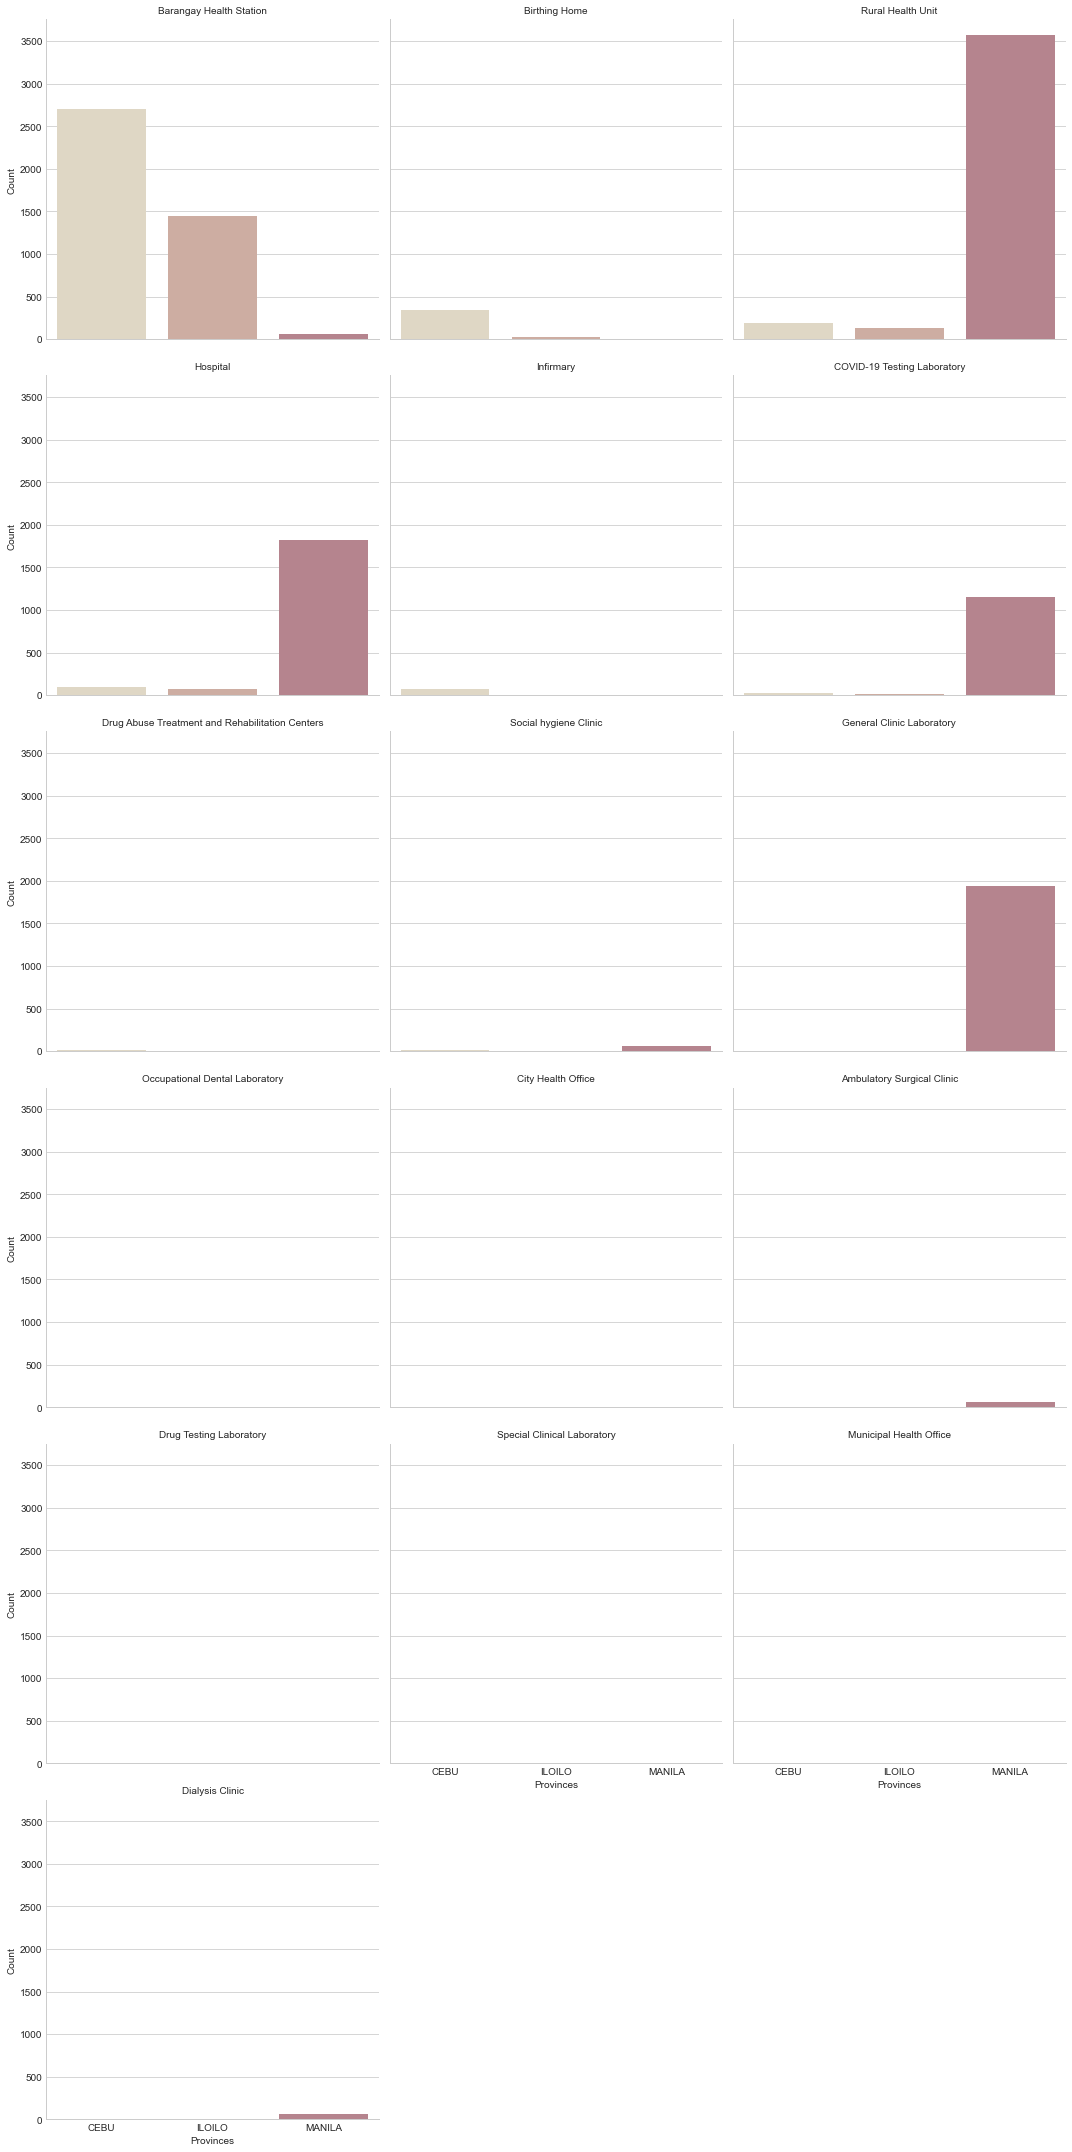

In [21]:
g = sns.FacetGrid(byprovince, col="Facility Type", col_wrap=3, hue="Province", 
                            palette=sns.color_palette("ch:s=-.2,r=.6"), height=5)
g.map(sns.barplot, "Province", "Count", order=byprovince['Province'].unique())
g.set_axis_labels('Provinces', 'Count')
g.set_titles('{col_name}')

plt.show()

Looking at the number of facilities in a province alone, we could see that the City of Manila has the least amount overall. However, when we take area into account, we can see that it has the most facilites per unit area.